[![xtensor](Amego_banner.png)](https://asd.gsfc.nasa.gov/amego/)


You can find MEGAlib basic documentation here: http://megalibtoolkit.com/home.html

In [1]:
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from ipywidgets import Layout, interactive

from gwidgets import SelectFilesButton
from revanParsing import RevFileParser_general, RevFileParser_events
from gParsing import DetectorIDdict

# Upload your .tra file 

Browse the simulated file (.tra file by revan run):

In [2]:
browse_file = SelectFilesButton()
browse_file

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='gray'))

In [3]:
revan_file = browse_file.files[0]
revan_file

'/Users/isabellabrewer/astropix/AtlasPix/different_triggers_6.inc1.id1.tra'

## Access the simulation main infos

In [4]:
general_infos = RevFileParser_general(revan_file)
df_general = pd.DataFrame(general_infos)

Here is your dataframe:

In [5]:
df_general[['Version', 'Geometry','Date', 'MEGAlib']]

,Version,Geometry,Date,MEGAlib
0,1,GeometryFile,Date,2.34.01
1,,/Users/isabellabrewer/astropix/AtlasPix/geomet...,2020-03-05,
2,,,14:33:05,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,


# Plotting

## Load simulated events with pandas

In [6]:
rev_events = RevFileParser_events(revan_file)
df_events = pd.DataFrame(rev_events).T
df_events

Trigger statistics:

  Not triggered events: ..................................  40391

  Number of vetoed events: ...............................      0

  Number of triggered events: ............................  59609

    Trg_SiPix1: ..........................................   7970

    Trg_SiPix2: ..........................................  10316

    Trg_SiPix3: ..........................................  15064

    Trg_SiPix4: ..........................................  26259



----------------------------------------------------------------------------



Event statistics for all triggered (!) events:

  Number of events .......................................  59609 (100.000%)

  Number of events, which passed event selections ........  59609 (100.000%)

  Reconstructable events .................................  59599 ( 99.983%)

       Single-site  ......................................  59599 (100.000%)

       Compton  ..........................................      0 ( 

,ET,ID,TI,PE,PP
0,PH,3,7.9995e-05,24.6639,"[0.0, -0.47117, 0.0]"
1,PH,5,0.000210637,22.2012,"[0.14311, -0.67167, 0.0]"
2,PH,8,0.000422276,22.1116,"[0.14311, -0.76791, 0.0]"
3,PH,9,0.000447018,21.9337,"[0.15612, -0.403, 0.0]"
4,PH,10,0.000459897,25.6172,"[-0.07806, 0.71177, 0.0]"
...,...,...,...,...,...
59594,PH,99994,4.08833,24.7477,"[0.09107, -0.3629, 0.0]"
59595,PH,99995,4.08842,24.7607,"[0.1301, -0.62756, 0.0]"
59596,PH,99996,4.08845,24.8096,"[0.07806, -0.75187, 0.0]"
59597,PH,99997,4.0885,25.347,"[-0.05204, 0.35889, 0.0]"


In [7]:
df_events['PP'][1:2][1][0]

0.14311

In [8]:
x_hits = np.zeros(len(df_events))
y_hits = np.zeros(len(df_events))
e_dep = np.zeros(len(df_events))

for i in range(len(df_events)):
    x_hits[i] = float(df_events[i:i+1]['PP'][i][0])
    y_hits[i] = float(df_events[i:i+1]['PP'][i][1])
    e_dep[i] = float(df_events[i:i+1]['PE'][i])

Text(0.5, 0, 'keV')

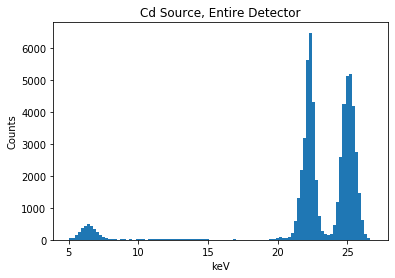

In [9]:
plt.hist(e_dep, bins=100)
plt.title('Cd Source, Entire Detector')
plt.ylabel('Counts')
plt.xlabel('keV')

In [10]:
def pixel_spectrum(hits_data, x_pixel, y_pixel):
    
    x_hits = np.zeros(len(df_events))
    y_hits = np.zeros(len(df_events))
    e_dep = np.zeros(len(df_events))

    for i in range(len(df_events)):
        x_hits[i] = float(df_events[i:i+1]['PP'][i][0])
        y_hits[i] = float(df_events[i:i+1]['PP'][i][1])
        e_dep[i] = float(df_events[i:i+1]['PE'][i])
    
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2

    x_edge = np.zeros(x_num+1)
    y_edge = np.zeros(y_num+1)

    for i in range(x_num+1):
        x_edge[i] = i*x_dim - half_width
    
    for i in range(y_num+1):
        y_edge[i] = i*y_dim - half_height
        
    index = []
    
    for i in range(len(x_hits)):
        if x_edge[x_pixel]<x_hits[i]<x_edge[x_pixel+1] and y_edge[y_pixel]<y_hits[i]<y_edge[y_pixel+1]:
            index = np.append(index, i)

    if len(index)==0:
        print("No pixels matching this description triggered.")
    else:
        print("There are %d total triggers." %(len(index)))
        e_hits = np.zeros(len(index))
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(10, 6))
        for i in range(len(index)):
            e_hits[i] = e_dep[int(index[i])]
        plt.hist(e_hits)
        plt.title('Energy Spectrum for Pixel %d, %d' %(x_pixel, y_pixel))
        plt.xlabel('Energy (keV)')
        plt.ylabel('Counts')

There are 19 total triggers.


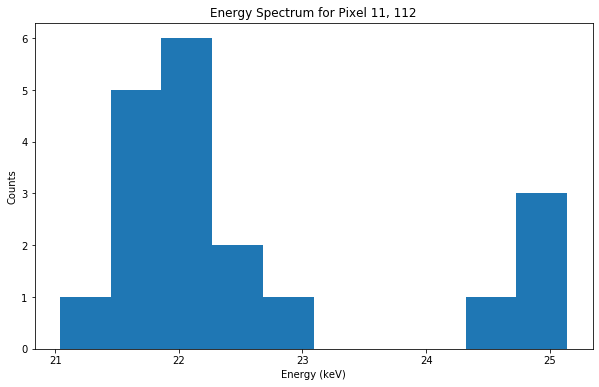

In [51]:
pixel_spectrum(df_events,11,112)

In [60]:
print(H[112][11])

NameError: name 'H' is not defined

In [11]:
def hit_positions(hits_data, x_tick, y_tick, title):
    """
    
    hits_data: Pandas dataset. --> Contains the hit locations and energies.
               
    x_tick: float. --> Number of ticks you want for the x axis.
               
    y_tick: float. --> Number of ticks you want for the y axis.
               
    title: string. --> Title of the plot.
            
    
    """
    # Find the x and y position of each hit.
    x_hits = np.zeros(len(df_events))
    y_hits = np.zeros(len(df_events))

    for i in range(len(df_events)):
        x_hits[i] = float(df_events[i:i+1]['PP'][i][0])
        y_hits[i] = float(df_events[i:i+1]['PP'][i][1])
    
    # Establish the physical parameters of the detector:
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction

    # Plot
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(14, 10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.plot(x_hits,y_hits,'.',color='blue')
    # Arrange the ticks
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2
    ax.set_xticks((np.arange(0,x_num,5)*x_dim - half_width + (x_dim/2)))
    ax.set_yticks((np.arange(0,y_num,20)*y_dim - half_height + (y_dim/2)))
    ax.set_xticklabels(np.flip(np.arange(0,x_num,5)))
    ax.set_yticklabels(np.flip(np.arange(0,y_num,20)))
    plt.xlim(-half_width, half_width)
    plt.ylim(-half_height, half_height)
    plt.xlabel('Pixel Number', size=12)
    plt.ylabel('Pixel Number', size=12)
    plt.title(title, size=14)
    
    return

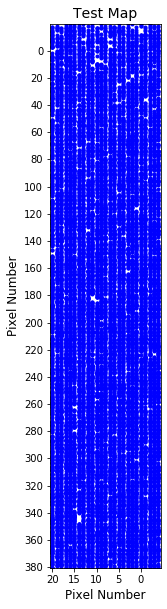

In [12]:
hit_positions(df_events,5,20,'Test Map')

In [10]:
def hit_heatmap(hits_data, x_tick, y_tick, title):
    """
    
    hits_data: Pandas dataset. --> Contains the hit locations and energies.
               
    x_tick: float. --> Number of ticks you want for the x axis.
               
    y_tick: float. --> Number of ticks you want for the y axis.
               
    title: string. --> Title of the plot.
            
    
    """
    # Find the x and y position of each hit.
    x_hits = np.zeros(len(df_events))
    y_hits = np.zeros(len(df_events))

    for i in range(len(df_events)):
        x_hits[i] = float(df_events[i:i+1]['PP'][i][0])
        y_hits[i] = float(df_events[i:i+1]['PP'][i][1])
    
    # Establish the physical parameters of the detector:
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction

    # Plot
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(14, 10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2
    
    # Plot the heatmap
    limits = [-half_width, half_width, -half_height, half_height]
    x_edges = np.linspace(-half_width, half_width, x_num+1)
    y_edges = np.linspace(-half_height, half_height, y_num+1)
    
    H, xedges, yedges = np.histogram2d(x_hits, y_hits, bins=[x_edges, y_edges])
    H = H.T
    im = plt.imshow(H, interpolation='nearest', origin='low', extent=[limits[0], limits[1], limits[2], limits[3]])
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Number of Hits', rotation=-90, va="bottom")
    # Arrange the ticks
    ax.set_xticks(np.linspace(0,24,5)*-x_dim + half_width - (x_dim/2))
    ax.set_yticks(np.linspace(0,399,20)*-y_dim + half_height - (y_dim/2))
    ax.set_xticklabels(np.linspace(0,24,5,dtype=int))
    ax.set_yticklabels(np.linspace(0,399,20,dtype=int))
    plt.xlim(-half_width, half_width)
    plt.ylim(-half_height, half_height)
    plt.xlabel('Pixel Number', size=12)
    plt.ylabel('Pixel Number', size=12)
    plt.title(title, size=14)
    
    return

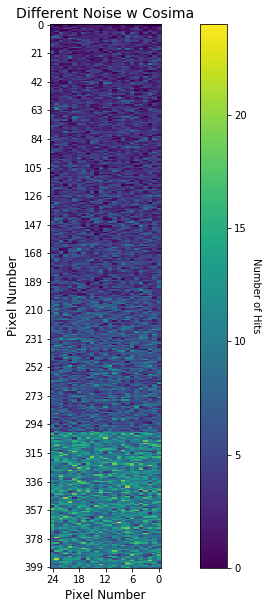

In [11]:
hit_heatmap(df_events,5,20,'Different Noise w Cosima')

In [ ]:
#H, xedges, yedges = np.histogram2d(x_hits, y_hits, bins=[x_edge,y_edge], range=limits)
#H = H.T 
#im = ax.imshow(H, interpolation='nearest', extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]])

In [22]:
x_dim = 130*(10**-4) # x dimension of each pixel in cm
y_dim = 40*(10**-4) # x dimension of each pixel in cm
x_num = 25 # Number of pixels in the x direction
y_num = 400 # Number of pixels in the y direction
half_width = x_dim*x_num/2
half_height = y_dim*y_num/2
(np.arange(5,25,4)*-x_dim + half_width - (x_dim/2))

array([ 0.091,  0.039, -0.013, -0.065, -0.117])

In [31]:
np.linspace(0,24,5)*-x_dim + half_width - (x_dim/2)

array([ 1.56000000e-01,  7.80000000e-02, -2.25514052e-17, -7.80000000e-02,
       -1.56000000e-01])

In [30]:
half_width - (x_dim/2)

0.156

In [12]:
np.linspace(0,24,5,dtype=int)

array([ 0,  6, 12, 18, 24])